In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

from sklearn.metrics import plot_confusion_matrix


import seaborn as sn
from sklearn.model_selection import train_test_split

from sklearn.decomposition import LatentDirichletAllocation
from sklearn import feature_extraction, manifold


from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

from sklearn.ensemble import StackingClassifier
from sklearn.base import clone

import pickle

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

In [ ]:
 from sklearn.neural_network import MLPClassifier
 from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Evaluate the model

In [ ]:
def model_Evaluate(model,X_test):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    #Print the evaluation metrics for the dataset.
    f1=f1_score(y_test, y_pred, average='weighted')
    print("the weighted f1_score:",f1)
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(model, X_test,y_test, values_format='d')
    plt.show()
    #plot_multiclass_roc(model, X_test, y_test,figsize=(8, 6))
    return f1

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(clf, X_test, y_test, figsize=(8, 6)):
        n_classes=6
        y_score = clf.decision_function(X_test)

        # structures
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        # calculate dummies once
        y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # roc for each class
        fig, ax = plt.subplots(figsize=figsize)
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('Receiver operating characteristic example')
        for i in range(n_classes):
            ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
        ax.legend(loc="best")
        ax.grid(alpha=.4)
        plt.show()

In [ ]:
from collections import Counter

def get_separate_words( tweets,top=20 ):
  tweets=list(tweets)
  all_words = [ ]
  for x in range( len( tweets  )  ):
      all_words.append( tweets[x].split() )

  all_words=sum(all_words, [])
  Count = Counter(all_words)
  most_occur = Count.most_common(top)
  fig, ax = plt.subplots(nrows=1)
  fig.suptitle("Most frequent words", fontsize=15)
      
  ## unigrams
  dtf_uni = pd.DataFrame(most_occur, 
                        columns=["Word","Freq"])
  dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                    kind="barh", title="Unigrams", ax=ax, 
                    legend=False).grid(axis='x')
  ax.set(ylabel=None)
#all_words=get_separate_words(final_df['clean_text'] )

# Read data

In [ ]:
final_df = pd.read_csv("/content/drive/MyDrive/data_source  text.csv")

In [ ]:
stop2 = ['feel','feels','feeling','like','get','really','little','time','know','people','still','would','things','one','want','think','even','didnt','dont','wasnt','werent','today','time','go','went','man','bit','way','day']
final_df['clean_text']= final_df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop2))

In [ ]:
final_df=final_df[['sentence','clean_text','label']]

In [ ]:
final_df.columns=['text','clean_text','Emotion']

# seperate text & sentiment

In [ ]:
emotion=final_df['Emotion']
text=final_df['clean_text']

**split the data**

In [ ]:

X_train_split , X_test_split , y_train , y_test = train_test_split(text , emotion , train_size = 0.8 , test_size = 0.2 , random_state = 42)


In [ ]:
print('xtrain : ',len(X_train_split),' xtest : ',len(X_test_split))

xtrain :  16000  xtest :  4000


In [ ]:
y_train.value_counts()

joy         5410
sadness     4598
anger       2173
fear        1914
love        1329
surprise     576
Name: Emotion, dtype: int64

In [ ]:
y_test.value_counts()

joy         1360
sadness     1168
anger        536
fear         447
love         331
surprise     158
Name: Emotion, dtype: int64

In [ ]:
tfidf=Tf_Idf(X_train_split)
text_tf=tfidf.transform(X_train_split)
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(text_tf)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],c=df['continent'].map(colors))

NameError: ignored

In [ ]:
colors = {'anger':'red', 'joy':'green', 'fear':'blue', 'surprise':'yellow','love':'orange','sadness':'black'}


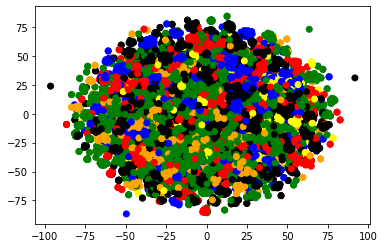

In [ ]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],c=y_train.map(colors))

# Feature Extraction

In [ ]:
############### TF_IDF function #############
def Tf_Idf(   text ):
    Incoder = TfidfVectorizer(ngram_range=(1,1))
    Incoder.fit(text)
    TF_IDF_text = Incoder.transform(text)
    pickle.dump(Incoder, open('/content/drive/MyDrive/emotion_tfidf.P','wb'))
    return Incoder



In [ ]:
############### bigram #############
def bi_gram(   text ):
    Incoder = TfidfVectorizer(ngram_range=(1,2))
    Incoder.fit(text)
    bigram_text = Incoder.transform(text)
    #pickle.dump(Incoder, open('/content/drive/MyDrive/emotion_bigram.P','wb'))
    return Incoder

In [ ]:
############### Trigram #############
def tri_gram(   text ):
    Incoder = TfidfVectorizer(ngram_range=(1,3))
    Incoder.fit(text)
    trigram_text = Incoder.transform(text)
    #pickle.dump(Incoder, open('/content/drive/MyDrive/emotion_trigram.P','wb'))
    return Incoder

# **RF**

In [ ]:
def rfClassifier(X_train, y_train):
    classifier_rf = RandomForestClassifier(random_state=109, n_jobs=-1, n_estimators=501)
    classifier_rf.fit(X_train, y_train)
    model_Evaluate(classifier_rf,X_test)
    return classifier_rf

# **TF with feature selection**

In [ ]:
tfidf=Tf_Idf(X_train_split )
#tfidf= pickle.load( open('/content/drive/MyDrive/emotion_tfidf.P', "rb" ))
X_train=tfidf.transform(X_train_split)
X_test=tfidf.transform(X_test_split)

In [ ]:
print("X_train:",X_train.shape, " X_test:",X_test.shape)

X_train: (16000, 14674)  X_test: (4000, 14674)


In [ ]:
tfidf=Tf_Idf(X_train_split)
text_tf=tfidf.transform(X_train_split)
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(text_tf)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],)

## xgboost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate=0.7, n_estimators=600, use_label_encoder=False,eval_metric='logloss')
classifier.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', learning_rate=0.7, n_estimators=600,
              objective='multi:softprob', use_label_encoder=False)

the weighted f1_score: 0.9934985040605072
              precision    recall  f1-score   support

       anger       0.99      0.99      0.99      2173
        fear       0.99      0.99      0.99      1914
         joy       0.99      1.00      0.99      5410
        love       0.99      0.99      0.99      1329
     sadness       1.00      0.99      1.00      4598
    surprise       0.99      1.00      0.99       576

    accuracy                           0.99     16000
   macro avg       0.99      0.99      0.99     16000
weighted avg       0.99      0.99      0.99     16000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


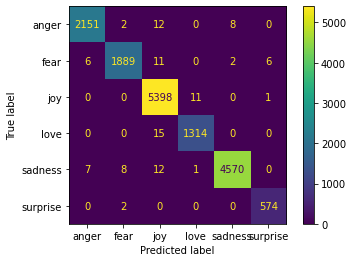

In [ ]:
# Predict values for Test dataset
y_pred = classifier.predict(X_train)
#Print the evaluation metrics for the dataset.
f1=f1_score(y_train, y_pred, average='weighted')
print("the weighted f1_score:",f1)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(classifier, X_train,y_train, values_format='d')
plt.show()

the weighted f1_score: 0.9092100178591511
              precision    recall  f1-score   support

       anger       0.93      0.88      0.90       536
        fear       0.86      0.89      0.87       447
         joy       0.91      0.94      0.93      1360
        love       0.82      0.84      0.83       331
     sadness       0.95      0.93      0.94      1168
    surprise       0.83      0.78      0.80       158

    accuracy                           0.91      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.91      0.91      0.91      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


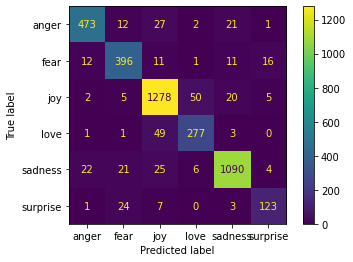

0.9092100178591511

In [ ]:
model_Evaluate(classifier,X_test)

## rf

the weighted f1_score: 0.9037784528820645
              precision    recall  f1-score   support

       anger       0.91      0.87      0.89       536
        fear       0.85      0.88      0.86       447
         joy       0.91      0.94      0.92      1360
        love       0.84      0.82      0.83       331
     sadness       0.95      0.93      0.94      1168
    surprise       0.86      0.77      0.81       158

    accuracy                           0.90      4000
   macro avg       0.88      0.87      0.88      4000
weighted avg       0.90      0.90      0.90      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


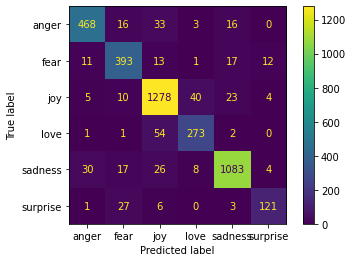

In [ ]:
modelrf=rfClassifier(X_train, y_train)

## MLP

In [ ]:
from sklearn.model_selection import learning_curve,GridSearchCV
classifier = MLPClassifier(max_iter=1000, alpha=0.5,momentum=0.6,solver='adam',random_state=42)
param = {
    'hidden_layer_sizes': [(2,), (4,), (6,), (8,),(10,),(20,), (40,), (60,), (80,),(100,)]
}
grid = GridSearchCV(classifier, param, cv=2, scoring='f1_macro')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#static
model = grid.best_estimator_
model.fit(X_train, y_train)

0.797312920909465
{'hidden_layer_sizes': (20,)}
MLPClassifier(alpha=0.5, hidden_layer_sizes=(20,), max_iter=1000, momentum=0.6,
              random_state=42)


MLPClassifier(alpha=0.5, hidden_layer_sizes=(20,), max_iter=1000, momentum=0.6,
              random_state=42)

the weighted f1_score: 0.8757816656941009
              precision    recall  f1-score   support

       anger       0.92      0.81      0.86       536
        fear       0.86      0.81      0.83       447
         joy       0.85      0.97      0.91      1360
        love       0.91      0.66      0.77       331
     sadness       0.90      0.96      0.93      1168
    surprise       0.95      0.46      0.62       158

    accuracy                           0.88      4000
   macro avg       0.90      0.78      0.82      4000
weighted avg       0.88      0.88      0.88      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


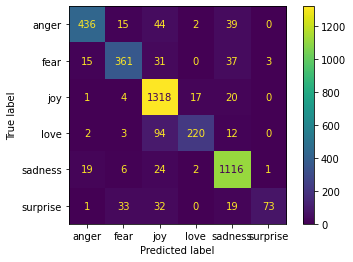

0.8757816656941009

In [ ]:
model_Evaluate(model,X_test)

In [ ]:
from sklearn.model_selection import learning_curve,GridSearchCV
classifier = MLPClassifier(max_iter=1000, hidden_layer_sizes=(20,),solver='adam',random_state=42)
param = {
    'alpha':[0.1 ,0.2 ,0.5 ,0.7 ,0.9]
}
grid = GridSearchCV(classifier, param, cv=2, scoring='f1_macro')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#static
model = grid.best_estimator_
model.fit(X_train, y_train)

0.8417192196425944
{'alpha': 0.1}
MLPClassifier(alpha=0.1, hidden_layer_sizes=(20,), max_iter=1000,
              random_state=42)


MLPClassifier(alpha=0.1, hidden_layer_sizes=(20,), max_iter=1000,
              random_state=42)

the weighted f1_score: 0.9070280644435567
              precision    recall  f1-score   support

       anger       0.92      0.88      0.90       536
        fear       0.87      0.86      0.86       447
         joy       0.91      0.95      0.93      1360
        love       0.87      0.81      0.84       331
     sadness       0.93      0.94      0.94      1168
    surprise       0.88      0.75      0.81       158

    accuracy                           0.91      4000
   macro avg       0.89      0.87      0.88      4000
weighted avg       0.91      0.91      0.91      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


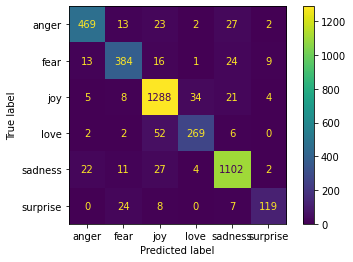

0.9070280644435567

In [ ]:
model_Evaluate(model,X_test)

In [ ]:
pickle.dump(model, open('/content/drive/MyDrive/mlp_tf90.p','wb'))

In [ ]:
from sklearn.model_selection import learning_curve,GridSearchCV
classifier = MLPClassifier(alpha=0.1, hidden_layer_sizes=(20,), max_iter=1000, random_state=42)
param = {
    'momentum':[0.1 ,0.2 ,0.5 ,0.7 ,0.9]
}
grid = GridSearchCV(classifier, param, cv=2, scoring='f1_macro')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
#static
model = grid.best_estimator_
model.fit(X_train, y_train)

0.8417192196425944
{'momentum': 0.1}
MLPClassifier(alpha=0.1, hidden_layer_sizes=(20,), max_iter=1000, momentum=0.1,
              random_state=42)


MLPClassifier(alpha=0.1, hidden_layer_sizes=(20,), max_iter=1000, momentum=0.1,
              random_state=42)

the weighted f1_score: 0.9070280644435567
              precision    recall  f1-score   support

       anger       0.92      0.88      0.90       536
        fear       0.87      0.86      0.86       447
         joy       0.91      0.95      0.93      1360
        love       0.87      0.81      0.84       331
     sadness       0.93      0.94      0.94      1168
    surprise       0.88      0.75      0.81       158

    accuracy                           0.91      4000
   macro avg       0.89      0.87      0.88      4000
weighted avg       0.91      0.91      0.91      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


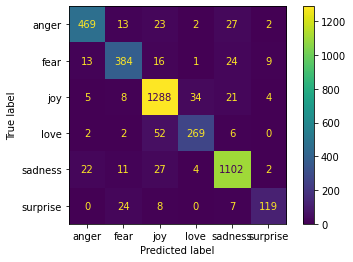

0.9070280644435567

In [ ]:
model_Evaluate(model,X_test)

In [ ]:
def MLPmodel(X_train, y_train):
  clf = MLPClassifier(alpha=0.1, hidden_layer_sizes=(20,), max_iter=1000,random_state=42,momentum=0.1)
  clf.fit(X_train, y_train)
  model_Evaluate(clf,X_test)
  return clf

### feature selection

#### 10000

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
selection=SelectKBest(chi2, k=10000)
X_train= selection.fit_transform(X_train, y_train)
X_test= selection.transform(X_test)
print('xtrain : ',X_train.shape,'xtest : ',X_test.shape)

xtrain :  (16000, 10000) xtest :  (4000, 10000)


##### xgboost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate=0.7, n_estimators=600, use_label_encoder=False,eval_metric='logloss')
classifier.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', learning_rate=0.7, n_estimators=600,
              objective='multi:softprob', use_label_encoder=False)

the weighted f1_score: 0.9930592304859501
              precision    recall  f1-score   support

       anger       0.99      0.99      0.99      2173
        fear       1.00      0.98      0.99      1914
         joy       0.99      1.00      0.99      5410
        love       0.99      0.98      0.99      1329
     sadness       1.00      0.99      1.00      4598
    surprise       0.99      1.00      0.99       576

    accuracy                           0.99     16000
   macro avg       0.99      0.99      0.99     16000
weighted avg       0.99      0.99      0.99     16000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


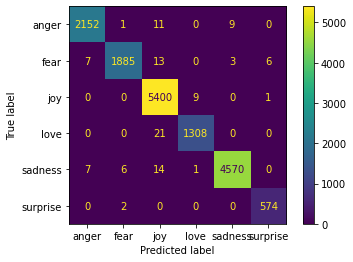

In [ ]:
# Predict values for Test dataset
y_pred = classifier.predict(X_train)
#Print the evaluation metrics for the dataset.
f1=f1_score(y_train, y_pred, average='weighted')
print("the weighted f1_score:",f1)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(classifier, X_train,y_train, values_format='d')
plt.show()

the weighted f1_score: 0.9103286474103371
              precision    recall  f1-score   support

       anger       0.93      0.89      0.91       536
        fear       0.88      0.88      0.88       447
         joy       0.91      0.94      0.93      1360
        love       0.83      0.83      0.83       331
     sadness       0.95      0.93      0.94      1168
    surprise       0.82      0.77      0.80       158

    accuracy                           0.91      4000
   macro avg       0.89      0.87      0.88      4000
weighted avg       0.91      0.91      0.91      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


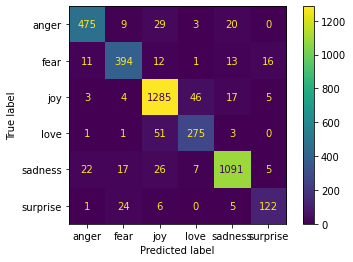

0.9103286474103371

In [ ]:
model_Evaluate(classifier,X_test)

###### rf

the weighted f1_score: 0.9037973655297947
              precision    recall  f1-score   support

       anger       0.92      0.87      0.90       536
        fear       0.84      0.89      0.86       447
         joy       0.90      0.94      0.92      1360
        love       0.84      0.80      0.82       331
     sadness       0.94      0.94      0.94      1168
    surprise       0.89      0.75      0.81       158

    accuracy                           0.90      4000
   macro avg       0.89      0.86      0.87      4000
weighted avg       0.90      0.90      0.90      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


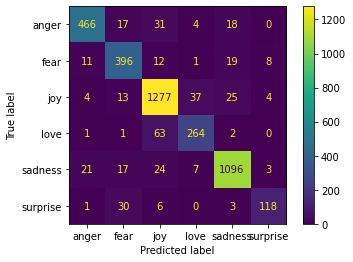

In [ ]:
modelrf=rfClassifier(X_train, y_train)

###### MLP

the weighted f1_score: 0.9034475586217137
              precision    recall  f1-score   support

       anger       0.92      0.85      0.89       536
        fear       0.86      0.85      0.86       447
         joy       0.90      0.95      0.93      1360
        love       0.86      0.79      0.83       331
     sadness       0.93      0.95      0.94      1168
    surprise       0.89      0.73      0.80       158

    accuracy                           0.90      4000
   macro avg       0.89      0.86      0.87      4000
weighted avg       0.90      0.90      0.90      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


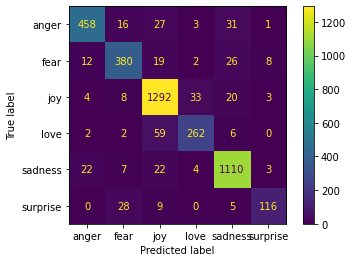

In [ ]:
mlp1=MLPmodel(X_train, y_train)

#### 5000

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
selection=SelectKBest(chi2, k=5000)
X_train= selection.fit_transform(X_train, y_train)
X_test= selection.transform(X_test)
print('xtrain : ',X_train.shape,'xtest : ',X_test.shape)

xtrain :  (16000, 5000) xtest :  (4000, 5000)


In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate=0.7, n_estimators=600, use_label_encoder=False,eval_metric='logloss')
classifier.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', learning_rate=0.7, n_estimators=600,
              objective='multi:softprob', use_label_encoder=False)

the weighted f1_score: 0.9083338872593739
              precision    recall  f1-score   support

       anger       0.92      0.88      0.90       536
        fear       0.87      0.87      0.87       447
         joy       0.91      0.94      0.93      1360
        love       0.84      0.84      0.84       331
     sadness       0.95      0.93      0.94      1168
    surprise       0.81      0.78      0.79       158

    accuracy                           0.91      4000
   macro avg       0.88      0.87      0.88      4000
weighted avg       0.91      0.91      0.91      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


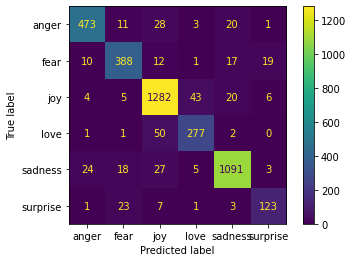

0.9083338872593739

In [ ]:
model_Evaluate(classifier,X_test)

###### rf

the weighted f1_score: 0.8991640336701001
              precision    recall  f1-score   support

       anger       0.92      0.87      0.89       536
        fear       0.82      0.89      0.85       447
         joy       0.90      0.94      0.92      1360
        love       0.85      0.77      0.81       331
     sadness       0.93      0.93      0.93      1168
    surprise       0.89      0.73      0.80       158

    accuracy                           0.90      4000
   macro avg       0.89      0.86      0.87      4000
weighted avg       0.90      0.90      0.90      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


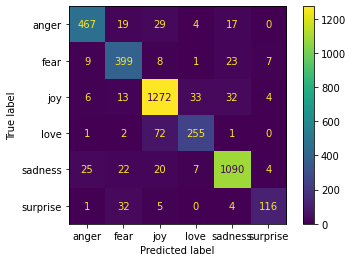

In [ ]:
modelrf=rfClassifier(X_train, y_train)

###### MLP

the weighted f1_score: 0.9044305850949117
              precision    recall  f1-score   support

       anger       0.92      0.86      0.89       536
        fear       0.85      0.86      0.86       447
         joy       0.91      0.95      0.93      1360
        love       0.87      0.78      0.82       331
     sadness       0.93      0.95      0.94      1168
    surprise       0.88      0.72      0.79       158

    accuracy                           0.91      4000
   macro avg       0.89      0.85      0.87      4000
weighted avg       0.91      0.91      0.90      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


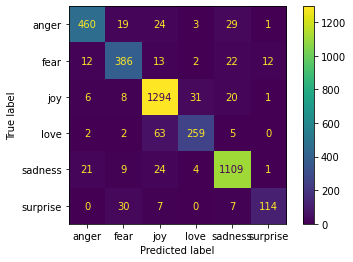

In [ ]:
mlp2=MLPmodel(X_train, y_train)

#### 1000

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
selection=SelectKBest(chi2, k=1000)
X_train= selection.fit_transform(X_train, y_train)
X_test= selection.transform(X_test)
print('xtrain : ',X_train.shape,'xtest : ',X_test.shape)

xtrain :  (16000, 1000) xtest :  (4000, 1000)


In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate=0.7, n_estimators=600, use_label_encoder=False,eval_metric='logloss')
classifier.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', learning_rate=0.7, n_estimators=600,
              objective='multi:softprob', use_label_encoder=False)

the weighted f1_score: 0.9028993741755024
              precision    recall  f1-score   support

       anger       0.92      0.88      0.90       536
        fear       0.86      0.87      0.86       447
         joy       0.90      0.94      0.92      1360
        love       0.84      0.82      0.83       331
     sadness       0.94      0.93      0.93      1168
    surprise       0.82      0.74      0.78       158

    accuracy                           0.90      4000
   macro avg       0.88      0.86      0.87      4000
weighted avg       0.90      0.90      0.90      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


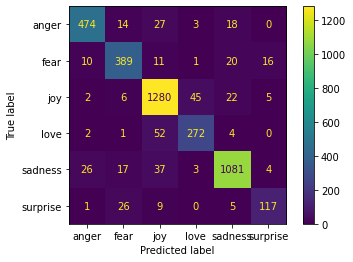

0.9028993741755024

In [ ]:
model_Evaluate(classifier,X_test)

###### rf

the weighted f1_score: 0.8921359777405604
              precision    recall  f1-score   support

       anger       0.89      0.88      0.88       536
        fear       0.82      0.90      0.86       447
         joy       0.92      0.91      0.91      1360
        love       0.79      0.85      0.82       331
     sadness       0.93      0.91      0.92      1168
    surprise       0.84      0.76      0.80       158

    accuracy                           0.89      4000
   macro avg       0.86      0.87      0.86      4000
weighted avg       0.89      0.89      0.89      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


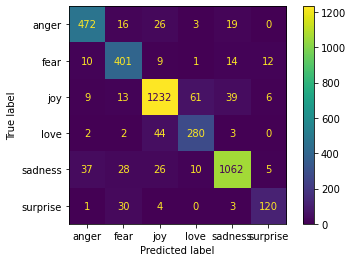

In [ ]:
modelrf=rfClassifier(X_train, y_train)

###### MLP

the weighted f1_score: 0.9013009097916679
              precision    recall  f1-score   support

       anger       0.90      0.88      0.89       536
        fear       0.85      0.85      0.85       447
         joy       0.90      0.96      0.93      1360
        love       0.88      0.77      0.82       331
     sadness       0.94      0.93      0.93      1168
    surprise       0.88      0.70      0.78       158

    accuracy                           0.90      4000
   macro avg       0.89      0.85      0.87      4000
weighted avg       0.90      0.90      0.90      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


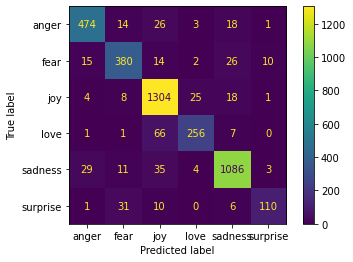

In [ ]:
mlp3=MLPmodel(X_train, y_train)

#**BIGRAM**

In [ ]:
bigram=bi_gram(X_train_split )
bi_gram(X_train_split )


TfidfVectorizer(ngram_range=(1, 2))

In [ ]:
X_train=bigram.transform(X_train_split)
X_test=bigram.transform(X_test_split)

In [ ]:
print("X_train:",X_train.shape, " X_test:",X_test.shape)

X_train: (16000, 95781)  X_test: (4000, 95781)


### feature selection

#### 10000

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
selection=SelectKBest(chi2, k=10000)
X_train= selection.fit_transform(X_train, y_train)
X_test= selection.transform(X_test)
print('xtrain : ',X_train.shape,'xtest : ',X_test.shape)

xtrain :  (16000, 10000) xtest :  (4000, 10000)


##### xgboost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate=0.7, n_estimators=700, use_label_encoder=False,eval_metric='logloss')
classifier.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', learning_rate=0.7, n_estimators=700,
              objective='multi:softprob', use_label_encoder=False)

the weighted f1_score: 0.9101252354980015
              precision    recall  f1-score   support

       anger       0.91      0.90      0.91       536
        fear       0.86      0.86      0.86       447
         joy       0.92      0.94      0.93      1360
        love       0.85      0.84      0.84       331
     sadness       0.95      0.94      0.94      1168
    surprise       0.82      0.79      0.80       158

    accuracy                           0.91      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.91      0.91      0.91      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


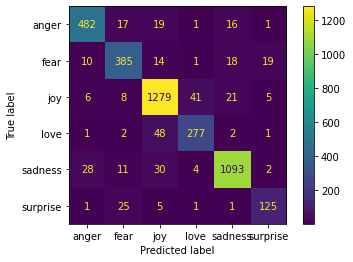

0.9101252354980015

In [ ]:
model_Evaluate(classifier,X_test)

###### rf

the weighted f1_score: 0.8938843113050154
              precision    recall  f1-score   support

       anger       0.90      0.90      0.90       536
        fear       0.83      0.87      0.85       447
         joy       0.90      0.94      0.92      1360
        love       0.90      0.72      0.80       331
     sadness       0.91      0.92      0.92      1168
    surprise       0.89      0.71      0.79       158

    accuracy                           0.90      4000
   macro avg       0.89      0.84      0.86      4000
weighted avg       0.90      0.90      0.89      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


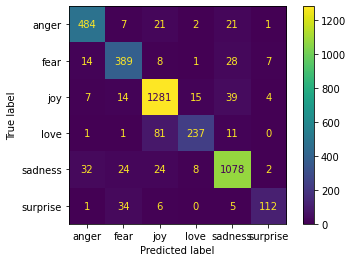

In [ ]:
modelrf=rfClassifier(X_train, y_train)

###### MLP

the weighted f1_score: 0.9094937516143247
              precision    recall  f1-score   support

       anger       0.92      0.88      0.90       536
        fear       0.86      0.87      0.86       447
         joy       0.91      0.96      0.93      1360
        love       0.89      0.79      0.84       331
     sadness       0.94      0.94      0.94      1168
    surprise       0.90      0.71      0.79       158

    accuracy                           0.91      4000
   macro avg       0.90      0.86      0.88      4000
weighted avg       0.91      0.91      0.91      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


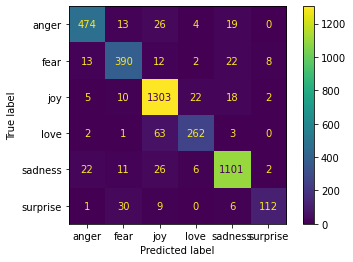

In [ ]:
mlp1=MLPmodel(X_train, y_train)

#### 5000

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
selection=SelectKBest(chi2, k=5000)
X_train= selection.fit_transform(X_train, y_train)
X_test= selection.transform(X_test)
print('xtrain : ',X_train.shape,'xtest : ',X_test.shape)

xtrain :  (16000, 5000) xtest :  (4000, 5000)


##### xgboost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate=0.7, n_estimators=700, use_label_encoder=False,eval_metric='logloss')
classifier.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', learning_rate=0.7, n_estimators=700,
              objective='multi:softprob', use_label_encoder=False)

the weighted f1_score: 0.9030305785708148
              precision    recall  f1-score   support

       anger       0.91      0.89      0.90       536
        fear       0.86      0.85      0.86       447
         joy       0.90      0.94      0.92      1360
        love       0.84      0.82      0.83       331
     sadness       0.94      0.93      0.94      1168
    surprise       0.81      0.78      0.80       158

    accuracy                           0.90      4000
   macro avg       0.88      0.87      0.87      4000
weighted avg       0.90      0.90      0.90      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


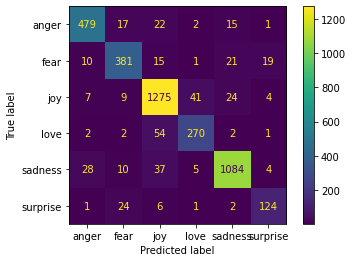

0.9030305785708148

In [ ]:
model_Evaluate(classifier,X_test)

###### rf

the weighted f1_score: 0.8842767995535072
              precision    recall  f1-score   support

       anger       0.89      0.88      0.88       536
        fear       0.80      0.88      0.84       447
         joy       0.90      0.93      0.91      1360
        love       0.85      0.74      0.79       331
     sadness       0.92      0.90      0.91      1168
    surprise       0.89      0.72      0.79       158

    accuracy                           0.89      4000
   macro avg       0.87      0.84      0.85      4000
weighted avg       0.89      0.89      0.88      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


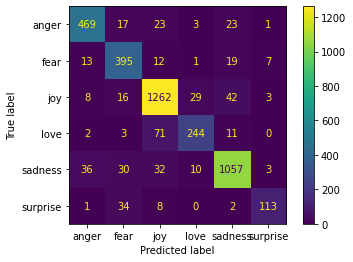

In [ ]:
modelrf=rfClassifier(X_train, y_train)

###### MLP

the weighted f1_score: 0.9039471258288816
              precision    recall  f1-score   support

       anger       0.92      0.89      0.90       536
        fear       0.84      0.86      0.85       447
         joy       0.90      0.95      0.92      1360
        love       0.86      0.79      0.82       331
     sadness       0.93      0.94      0.94      1168
    surprise       0.93      0.68      0.79       158

    accuracy                           0.91      4000
   macro avg       0.90      0.85      0.87      4000
weighted avg       0.91      0.91      0.90      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


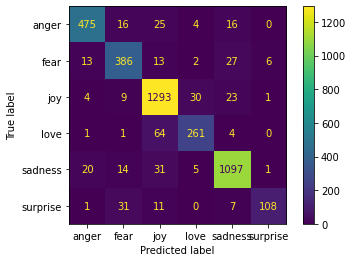

In [ ]:
mlp4=MLPmodel(X_train, y_train)

#### 1000

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
selection=SelectKBest(chi2, k=1000)
X_train= selection.fit_transform(X_train, y_train)
X_test= selection.transform(X_test)
print('xtrain : ',X_train.shape,'xtest : ',X_test.shape)

xtrain :  (16000, 1000) xtest :  (4000, 1000)


##### xgboost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate=0.7, n_estimators=700, use_label_encoder=False,eval_metric='logloss')
classifier.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', learning_rate=0.7, n_estimators=700,
              objective='multi:softprob', use_label_encoder=False)

the weighted f1_score: 0.8930964332779561
              precision    recall  f1-score   support

       anger       0.91      0.87      0.89       536
        fear       0.86      0.85      0.85       447
         joy       0.88      0.94      0.91      1360
        love       0.85      0.82      0.83       331
     sadness       0.94      0.90      0.92      1168
    surprise       0.81      0.78      0.80       158

    accuracy                           0.89      4000
   macro avg       0.87      0.86      0.87      4000
weighted avg       0.89      0.89      0.89      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


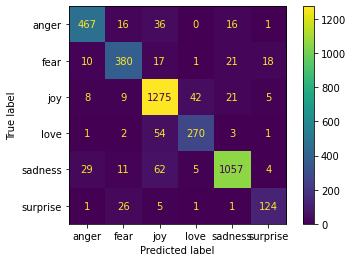

0.8930964332779561

In [ ]:
model_Evaluate(classifier,X_test)

###### rf

the weighted f1_score: 0.8774321915032515
              precision    recall  f1-score   support

       anger       0.87      0.88      0.87       536
        fear       0.82      0.89      0.85       447
         joy       0.88      0.90      0.89      1360
        love       0.79      0.81      0.80       331
     sadness       0.93      0.88      0.90      1168
    surprise       0.87      0.75      0.81       158

    accuracy                           0.88      4000
   macro avg       0.86      0.85      0.85      4000
weighted avg       0.88      0.88      0.88      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


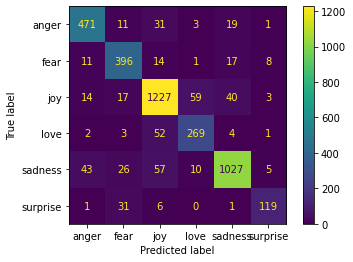

In [ ]:
modelrf=rfClassifier(X_train, y_train)

###### MLP

the weighted f1_score: 0.8938540440619223
              precision    recall  f1-score   support

       anger       0.91      0.88      0.89       536
        fear       0.84      0.87      0.85       447
         joy       0.89      0.93      0.91      1360
        love       0.82      0.85      0.83       331
     sadness       0.95      0.90      0.92      1168
    surprise       0.89      0.72      0.79       158

    accuracy                           0.89      4000
   macro avg       0.88      0.86      0.87      4000
weighted avg       0.90      0.89      0.89      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


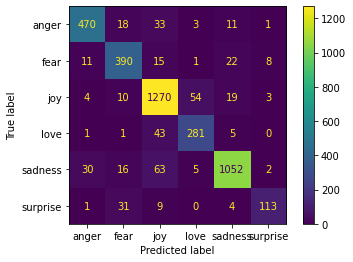

In [ ]:
mlp3=MLPmodel(X_train, y_train)

#**TRIGRAM**

**Trigram**

In [ ]:
trigram=tri_gram(X_train_split)

In [ ]:
X_train=trigram.transform(X_train_split)
X_test=trigram.transform(X_test_split)

In [ ]:
print("X_train:",X_train.shape, " X_test:",X_test.shape)

X_train: (16000, 170371)  X_test: (4000, 170371)


### feature selection

#### 20000

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
selection=SelectKBest(chi2, k=20000)
X_train= selection.fit_transform(X_train, y_train)
X_test= selection.transform(X_test)
print('xtrain : ',X_train.shape,'xtest : ',X_test.shape)

xtrain :  (16000, 20000) xtest :  (4000, 20000)


##### xgboost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate=0.7, n_estimators=700, use_label_encoder=False,eval_metric='logloss')
classifier.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', learning_rate=0.7, n_estimators=700,
              objective='multi:softprob', use_label_encoder=False)

the weighted f1_score: 0.9069072667065846
              precision    recall  f1-score   support

       anger       0.90      0.89      0.89       536
        fear       0.85      0.85      0.85       447
         joy       0.92      0.94      0.93      1360
        love       0.88      0.83      0.85       331
     sadness       0.94      0.93      0.94      1168
    surprise       0.79      0.81      0.80       158

    accuracy                           0.91      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.91      0.91      0.91      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


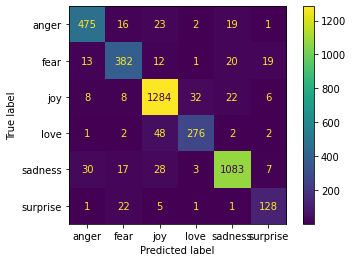

0.9069072667065846

In [ ]:
model_Evaluate(classifier,X_test)

###### rf

the weighted f1_score: 0.8974017704201769
              precision    recall  f1-score   support

       anger       0.93      0.88      0.90       536
        fear       0.83      0.87      0.85       447
         joy       0.90      0.95      0.92      1360
        love       0.91      0.70      0.80       331
     sadness       0.92      0.93      0.93      1168
    surprise       0.90      0.71      0.79       158

    accuracy                           0.90      4000
   macro avg       0.90      0.84      0.86      4000
weighted avg       0.90      0.90      0.90      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


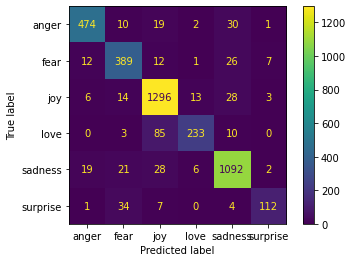

In [ ]:
modelrf=rfClassifier(X_train, y_train)

###### MLP

the weighted f1_score: 0.9043433936324415
              precision    recall  f1-score   support

       anger       0.91      0.87      0.89       536
        fear       0.84      0.87      0.85       447
         joy       0.91      0.95      0.93      1360
        love       0.89      0.78      0.83       331
     sadness       0.93      0.95      0.94      1168
    surprise       0.92      0.70      0.79       158

    accuracy                           0.91      4000
   macro avg       0.90      0.85      0.87      4000
weighted avg       0.91      0.91      0.90      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


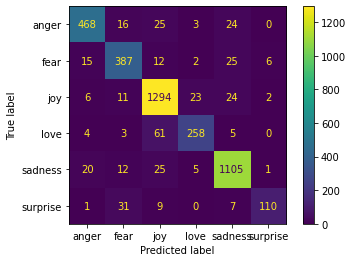

In [ ]:
mlp1=MLPmodel(X_train, y_train)

#### 10000

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
selection=SelectKBest(chi2, k=10000)
X_train= selection.fit_transform(X_train, y_train)
X_test= selection.transform(X_test)
print('xtrain : ',X_train.shape,'xtest : ',X_test.shape)

xtrain :  (16000, 10000) xtest :  (4000, 10000)


##### xgboost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate=0.7, n_estimators=700, use_label_encoder=False,eval_metric='logloss')
classifier.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', learning_rate=0.7, n_estimators=700,
              objective='multi:softprob', use_label_encoder=False)

the weighted f1_score: 0.9036622400002687
              precision    recall  f1-score   support

       anger       0.91      0.88      0.89       536
        fear       0.86      0.84      0.85       447
         joy       0.91      0.94      0.93      1360
        love       0.86      0.84      0.85       331
     sadness       0.94      0.92      0.93      1168
    surprise       0.79      0.83      0.81       158

    accuracy                           0.90      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.90      0.90      0.90      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


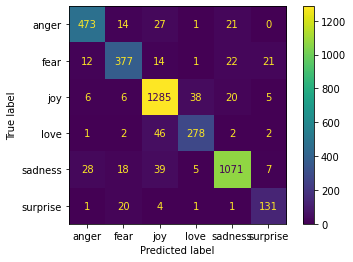

0.9036622400002687

In [ ]:
model_Evaluate(classifier,X_test)

###### rf

the weighted f1_score: 0.8876175038488144
              precision    recall  f1-score   support

       anger       0.90      0.87      0.89       536
        fear       0.80      0.87      0.84       447
         joy       0.89      0.94      0.92      1360
        love       0.87      0.72      0.79       331
     sadness       0.92      0.91      0.91      1168
    surprise       0.89      0.70      0.78       158

    accuracy                           0.89      4000
   macro avg       0.88      0.84      0.86      4000
weighted avg       0.89      0.89      0.89      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


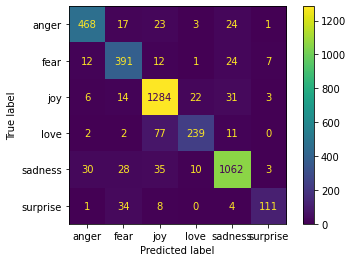

In [ ]:
modelrf=rfClassifier(X_train, y_train)

###### MLP

the weighted f1_score: 0.9038706542000741
              precision    recall  f1-score   support

       anger       0.91      0.90      0.90       536
        fear       0.84      0.86      0.85       447
         joy       0.90      0.95      0.92      1360
        love       0.85      0.79      0.82       331
     sadness       0.94      0.94      0.94      1168
    surprise       0.92      0.69      0.79       158

    accuracy                           0.90      4000
   macro avg       0.90      0.85      0.87      4000
weighted avg       0.90      0.90      0.90      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


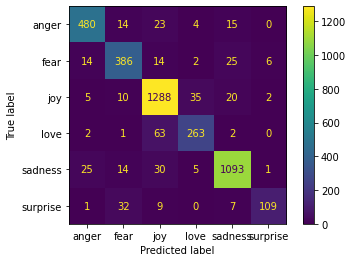

In [ ]:
mlp1=MLPmodel(X_train, y_train)

#### 5000

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
selection=SelectKBest(chi2, k=5000)
X_train= selection.fit_transform(X_train, y_train)
X_test= selection.transform(X_test)
print('xtrain : ',X_train.shape,'xtest : ',X_test.shape)

xtrain :  (16000, 5000) xtest :  (4000, 5000)


##### xgboost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate=0.7, n_estimators=700, use_label_encoder=False,eval_metric='logloss')
classifier.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', learning_rate=0.7, n_estimators=700,
              objective='multi:softprob', use_label_encoder=False)

the weighted f1_score: 0.9009995056245429
              precision    recall  f1-score   support

       anger       0.91      0.87      0.89       536
        fear       0.85      0.84      0.85       447
         joy       0.91      0.94      0.92      1360
        love       0.86      0.85      0.86       331
     sadness       0.94      0.92      0.93      1168
    surprise       0.77      0.82      0.80       158

    accuracy                           0.90      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.90      0.90      0.90      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


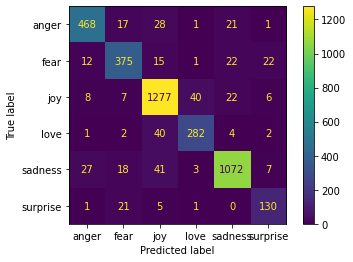

0.9009995056245429

In [ ]:
model_Evaluate(classifier,X_test)

###### rf

the weighted f1_score: 0.89048418059071
              precision    recall  f1-score   support

       anger       0.89      0.89      0.89       536
        fear       0.81      0.88      0.84       447
         joy       0.90      0.93      0.91      1360
        love       0.85      0.79      0.82       331
     sadness       0.93      0.90      0.91      1168
    surprise       0.89      0.70      0.78       158

    accuracy                           0.89      4000
   macro avg       0.88      0.85      0.86      4000
weighted avg       0.89      0.89      0.89      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


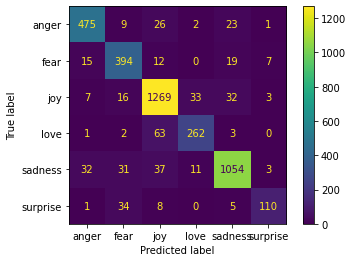

In [ ]:
modelrf=rfClassifier(X_train, y_train)


###### MLP

the weighted f1_score: 0.9003430235035853
              precision    recall  f1-score   support

       anger       0.93      0.89      0.91       536
        fear       0.84      0.87      0.86       447
         joy       0.90      0.94      0.92      1360
        love       0.83      0.82      0.82       331
     sadness       0.94      0.93      0.93      1168
    surprise       0.93      0.66      0.77       158

    accuracy                           0.90      4000
   macro avg       0.89      0.85      0.87      4000
weighted avg       0.90      0.90      0.90      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


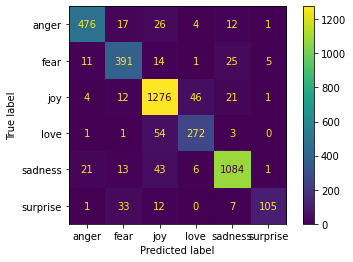

In [ ]:
mlp4=MLPmodel(X_train, y_train)

#### 1000

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
selection=SelectKBest(chi2, k=1000)
X_train= selection.fit_transform(X_train, y_train)
X_test= selection.transform(X_test)
print('xtrain : ',X_train.shape,'xtest : ',X_test.shape)

xtrain :  (16000, 1000) xtest :  (4000, 1000)


##### xgboost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate=0.7, n_estimators=700, use_label_encoder=False,eval_metric='logloss')
classifier.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', learning_rate=0.7, n_estimators=700,
              objective='multi:softprob', use_label_encoder=False)

the weighted f1_score: 0.8935597579839379
              precision    recall  f1-score   support

       anger       0.91      0.86      0.88       536
        fear       0.84      0.85      0.84       447
         joy       0.89      0.94      0.91      1360
        love       0.85      0.85      0.85       331
     sadness       0.95      0.90      0.92      1168
    surprise       0.79      0.80      0.80       158

    accuracy                           0.89      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.89      0.89      0.89      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


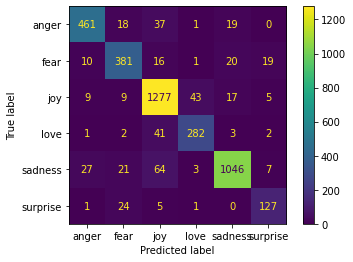

0.8935597579839379

In [ ]:
model_Evaluate(classifier,X_test)

###### rf

the weighted f1_score: 0.8812492599080841
              precision    recall  f1-score   support

       anger       0.88      0.88      0.88       536
        fear       0.81      0.88      0.84       447
         joy       0.89      0.91      0.90      1360
        love       0.80      0.84      0.82       331
     sadness       0.93      0.88      0.91      1168
    surprise       0.88      0.75      0.81       158

    accuracy                           0.88      4000
   macro avg       0.86      0.86      0.86      4000
weighted avg       0.88      0.88      0.88      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


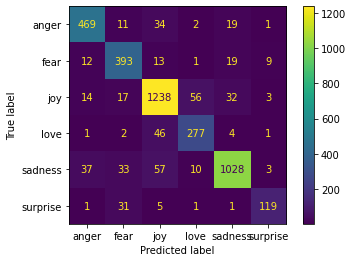

In [ ]:
modelrf=rfClassifier(X_train, y_train)

###### MLP

the weighted f1_score: 0.8934536907884012
              precision    recall  f1-score   support

       anger       0.90      0.88      0.89       536
        fear       0.84      0.87      0.85       447
         joy       0.88      0.93      0.91      1360
        love       0.81      0.86      0.84       331
     sadness       0.95      0.90      0.92      1168
    surprise       0.89      0.72      0.79       158

    accuracy                           0.89      4000
   macro avg       0.88      0.86      0.87      4000
weighted avg       0.90      0.89      0.89      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


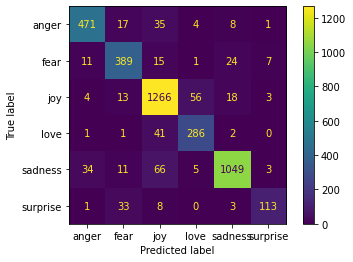

In [ ]:
mlp3=MLPmodel(X_train, y_train)

#**save winner** 

In [ ]:
X_train=tfidf.transform(X_train_split)
X_test=tfidf.transform(X_test_split)

In [ ]:
pickle.dump(model2, open('/content/drive/MyDrive/rf.P','wb'))

In [ ]:
pickle.dump(model1, open('/content/drive/MyDrive/mlp.P','wb'))

In [ ]:
tfidfemotion= pickle.load( open('/content/drive/MyDrive/emotion_tfidf.P', "rb" ) )

In [ ]:
rf=pickle.load( open('/content/drive/MyDrive/rf.P', "rb" ) )

In [ ]:
mlp= pickle.load( open('/content/drive/MyDrive/mlp.P', "rb" ) )

In [ ]:
Tfidf = pickle.load( open( "/content/drive/MyDrive/Tf_Idf.P", "rb" ) )

In [ ]:
stacking= pickle.load( open( "/content/drive/MyDrive/stacking1.P", "rb" ) )

In [ ]:
doc=['/content/drive/MyDrive/BMW.csv']

# stacking

In [ ]:
tfidf=Tf_Idf(X_train_split )
X_train=tfidf.transform(X_train_split)
X_test=tfidf.transform(X_test_split)

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
models = []
models.append(('MLP', MLPClassifier(alpha=0.1, hidden_layer_sizes=(20,), max_iter=1000, momentum=0.1,random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=109, n_jobs=-1, n_estimators=501)))
models.append(('XGBoost', XGBClassifier(learning_rate=0.7, n_estimators=700, use_label_encoder=False,eval_metric='logloss')))


In [ ]:
model = VotingClassifier(estimators=models, voting='soft')
model.fit(X_train,y_train)

VotingClassifier(estimators=[('MLP',
                              MLPClassifier(alpha=0.1, hidden_layer_sizes=(20,),
                                            max_iter=1000, momentum=0.1,
                                            random_state=42)),
                             ('RF',
                              RandomForestClassifier(n_estimators=501,
                                                     n_jobs=-1,
                                                     random_state=109)),
                             ('XGBoost',
                              XGBClassifier(eval_metric='logloss',
                                            learning_rate=0.7, n_estimators=700,
                                            use_label_encoder=False))],
                 voting='soft')

the weighted f1_score: 0.9174150494399049
              precision    recall  f1-score   support

       anger       0.93      0.88      0.91       536
        fear       0.87      0.90      0.89       447
         joy       0.92      0.95      0.94      1360
        love       0.85      0.85      0.85       331
     sadness       0.95      0.94      0.95      1168
    surprise       0.87      0.77      0.81       158

    accuracy                           0.92      4000
   macro avg       0.90      0.88      0.89      4000
weighted avg       0.92      0.92      0.92      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


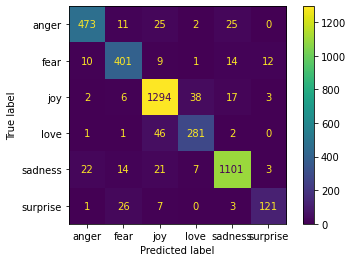

0.9174150494399049

In [ ]:
model_Evaluate(model,X_test)

In [ ]:
model55 = VotingClassifier(estimators=models, voting='hard')
model55.fit(X_train,y_train)

VotingClassifier(estimators=[('MLP',
                              MLPClassifier(alpha=0.1, hidden_layer_sizes=(20,),
                                            max_iter=1000, momentum=0.1,
                                            random_state=42)),
                             ('RF',
                              RandomForestClassifier(n_estimators=501,
                                                     n_jobs=-1,
                                                     random_state=109)),
                             ('XGBoost',
                              XGBClassifier(eval_metric='logloss',
                                            learning_rate=0.7, n_estimators=700,
                                            use_label_encoder=False))])

the weighted f1_score: 0.9142075931023096
              precision    recall  f1-score   support

       anger       0.93      0.88      0.91       536
        fear       0.86      0.90      0.88       447
         joy       0.92      0.95      0.93      1360
        love       0.85      0.84      0.84       331
     sadness       0.95      0.94      0.95      1168
    surprise       0.87      0.75      0.81       158

    accuracy                           0.91      4000
   macro avg       0.90      0.88      0.89      4000
weighted avg       0.91      0.91      0.91      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


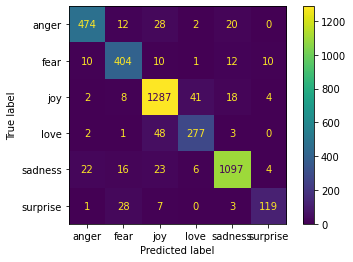

0.9142075931023096

In [ ]:
model_Evaluate(model55,X_test)

In [ ]:
model = VotingClassifier(estimators=models, voting='soft',n_jobs=1,weights=[2,1,3])
model.fit(X_train,y_train)

VotingClassifier(estimators=[('MLP',
                              MLPClassifier(alpha=0.1, hidden_layer_sizes=(20,),
                                            max_iter=1000, momentum=0.1,
                                            random_state=42)),
                             ('RF',
                              RandomForestClassifier(n_estimators=501,
                                                     n_jobs=-1,
                                                     random_state=109)),
                             ('XGBoost',
                              XGBClassifier(eval_metric='logloss',
                                            learning_rate=0.7, n_estimators=700,
                                            use_label_encoder=False))],
                 n_jobs=1, voting='soft', weights=[2, 1, 3])

the weighted f1_score: 0.9177167521395247
              precision    recall  f1-score   support

       anger       0.93      0.88      0.91       536
        fear       0.87      0.90      0.89       447
         joy       0.92      0.95      0.94      1360
        love       0.85      0.85      0.85       331
     sadness       0.95      0.95      0.95      1168
    surprise       0.87      0.77      0.82       158

    accuracy                           0.92      4000
   macro avg       0.90      0.88      0.89      4000
weighted avg       0.92      0.92      0.92      4000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


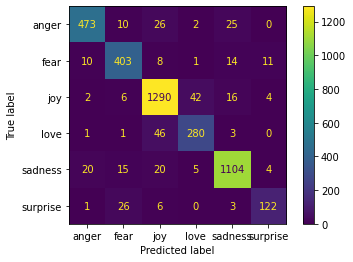

0.9177167521395247

In [ ]:
model_Evaluate(model,X_test)

In [ ]:
pickle.dump(model, open('/content/drive/MyDrive/voting.P','wb'))

In [ ]:

f1=[]
rs = 0
estimators = [XGBClassifier(learning_rate=0.7, n_estimators=600, use_label_encoder=False,eval_metric='logloss'),MLPClassifier(alpha=0.1, hidden_layer_sizes=(20,), max_iter=1000, momentum=0.1,
              random_state=42),RandomForestClassifier(random_state=109, n_jobs=-1, n_estimators=501)]
estimators = {estimator.__class__.__name__: estimator for estimator in estimators}

#Stacking (Aggregator svm)
stacking1 = StackingClassifier([(estName, clone(est)) for estName, est in estimators.items()], RandomForestClassifier(random_state=109, n_jobs=-1, n_estimators=501), n_jobs=-1)
stacking1.fit(X_train, y_train)
predY = stacking1.predict(X_test)
f1.append(accuracy_score(y_test, predY))


print(f1)


[0.90725]


the weighted f1_score: 0.9072557573514821


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


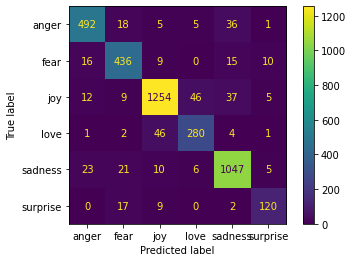

0.9072557573514821

In [ ]:
model_Evaluate(stacking1,X_test)

In [ ]:
pickle.dump(stacking1, open('/content/drive/MyDrive/stackingemotion.p','wb'))

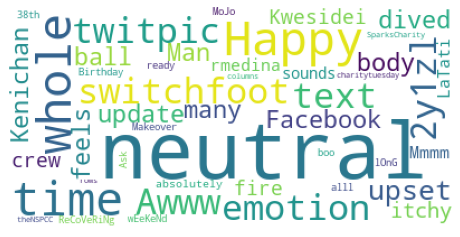

In [ ]:
import wordcloud
wc = wordcloud.WordCloud( background_color='white',    max_words=100 ,     max_font_size=70  )
wc = wc.generate(str(  df.loc[df['emotion']=='neutral'] ))
fig = plt.figure(figsize=(8, 8),num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

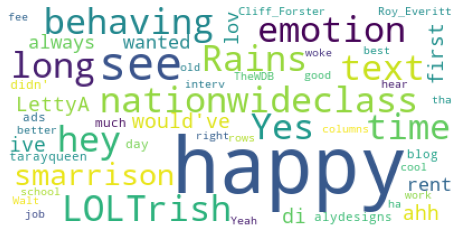

In [ ]:
wc = wordcloud.WordCloud( background_color='white',    max_words=100 ,     max_font_size=70  )
wc = wc.generate(str(  df.loc[df['emotion']=='happy'] ))
fig = plt.figure(figsize=(8, 8),num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [ ]:
i=0
for i in range(df.shape[0]):
    if df['emotion'][i]=='happy' and  df['class'][i]=='positive':
        i=i+1
print(i)

1588104


In [ ]:
i=0
for i in range(df.shape[0]):
    if df['emotion'][i]=='happy' and  df['class'][i]=='positive':
        i=i+1
print(i)

In [ ]:
 df['emotion'].value_counts()

neutral    1220791
happy       336197
sadness      12828
joy          10422
fear          4784
anger         3083
Name: emotion, dtype: int64

In [ ]:
df.head(30)

,text,clean_text,class,emotion
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",zl awww bummer shoulda david carr third,positive,neutral
1,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...,neutral,neutral
2,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest bounds,positive,neutral
3,my whole body feels itchy and like its on fire,whole body feels itchy like fire,positive,neutral
4,"@nationwideclass no, it's not behaving at all....",behaving mad see,negative,happy
5,@Kwesidei not the whole crew,whole crew,positive,neutral
6,Need a hug,need hug,neutral,neutral
7,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time see yes rains bit bit fine thank...,positive,happy
8,@Tatiana_K nope they didn't have it,nope didnt,neutral,neutral
9,@twittera que me muera ?,que muera,neutral,neutral


In [ ]:
 df['emotion'].value_counts()

neutral    1235689
happy       310278
sadness      17690
joy          16039
fear          5407
anger         3002
Name: emotion, dtype: int64

In [ ]:
 df['class'].value_counts()

neutral     625144
positive    623317
negative    339644
Name: class, dtype: int64

In [ ]:
 df['emotion'].value_counts()

neutral    1235689
happy       310278
sadness      17690
joy          16039
fear          5407
anger         3002
Name: emotion, dtype: int64

In [ ]:
negative=anger+fear+sadness
positive=happy+joy
neutral

In [ ]:
df.loc[df['emotion']=='anger']

NameError: ignored

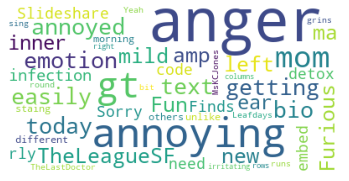

In [ ]:
import wordcloud
wc = wordcloud.WordCloud( background_color='white',    max_words=60 ,     max_font_size=70  )
wc = wc.generate(str(  df.loc[df['emotion']=='anger'] ))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

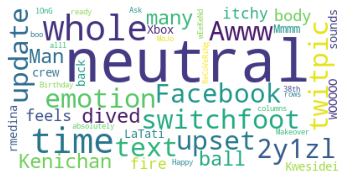

In [ ]:
import wordcloud
wc = wordcloud.WordCloud( background_color='white',    max_words=60 ,     max_font_size=70  )
wc = wc.generate(str(  df.loc[df['emotion']=='neutral'] ))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [ ]:
for path in doc:
    #read the data
    df = pd.read_csv(path,encoding='ISO-8859-1')
    #transform it using tf-idf
    #TF_IDF=Tfidf.transform(df['clean_text'])
    #predict
    #sentiment=stacking.predict(TF_IDF)
    tf_emotion=tfidfemotion.transform(df['clean_text'])
    emotion=mlp.predict(tf_emotion)
    #df['sentiment']=sentiment
    df['emotion']=emotion

In [ ]:
df['emotion'].value_counts()

neutral    830902
happy      736340
sadness      9621
joy          8039
fear         1916
anger        1287
Name: emotion, dtype: int64

In [ ]:
df['emotion'].value_counts()

neutral    830902
happy      736340
sadness      9621
joy          8039
fear         1916
anger        1287
Name: emotion, dtype: int64

In [ ]:
for path in doc:
    #read the data
    df = pd.read_csv(path,encoding='ISO-8859-1')
    #transform it using tf-idf
    #TF_IDF=Tfidf.transform(df['clean_text'])
    #predict
    #sentiment=stacking.predict(TF_IDF)
    tf_emotion=tfidfemotion.transform(df['clean_text'])
    emotion=mlp.predict(tf_emotion)
    #df['sentiment']=sentiment
    df['emotion']=emotion

In [ ]:
 df['class'].value_counts()

neutral     625144
positive    623317
negative    339644
Name: class, dtype: int64

In [ ]:
 df['emotion'].value_counts()

neutral    830902
happy      736340
sadness      9621
joy          8039
fear         1916
anger        1287
Name: emotion, dtype: int64

In [ ]:
 df['class'].value_counts()

neutral     625144
positive    623317
negative    339644
Name: class, dtype: int64

In [ ]:
 df['emotion'].value_counts()

nocode     1538879
joy          21496
sadness      14423
fear          9636
anger         3071
happy          600
Name: emotion, dtype: int64

In [ ]:
print(df.loc[df['emotion']=='anger'])

                                                      text  ... emotion
332      getting annoyed easily today  &gt;&gt;&gt; bio...  ...   anger
340      @TheLeagueSF Not Fun &amp; Furious? The new ma...  ...   anger
809      has a mild left inner ear infection.. and its ...  ...   anger
1159     Slideshare's embed code is annoying me.  Sorry...  ...   anger
1478     Finds her mom rly annoying. I need to detox an...  ...   anger
...                                                    ...  ...     ...
1577678    What an annoying morning this is staing to be.   ...   anger
1582464  You're very different mom, unlike the others m...  ...   anger
1585023  @Leafdays They are a bit annoying, aren't they...  ...   anger
1586089  @TheLastDoctor *grins and runs round him* sing...  ...   anger
1588046  @MsKCJones Yeah it's very irritating, right? B...  ...   anger

[3071 rows x 4 columns]


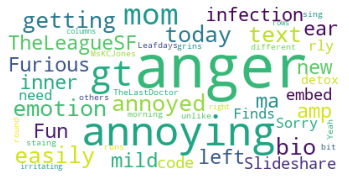

In [ ]:
wc = wordcloud.WordCloud( background_color='white',    max_words=60 ,     max_font_size=70  )
wc = wc.generate(str(  df.loc[df['emotion']=='anger'] ))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

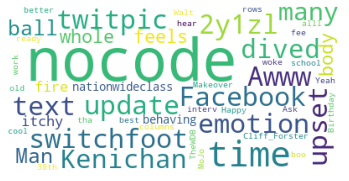

In [ ]:
wc = wordcloud.WordCloud( background_color='white',    max_words=60 ,     max_font_size=70  )
wc = wc.generate(str(  df.loc[df['emotion']=='nocode'] ))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [ ]:
df['emotion'].value_counts()

fear       678458
nocode     464571
neutral    374396
joy         44074
sadness     23088
anger        3518
Name: emotion, dtype: int64

In [ ]:
df['class'].value_counts()

neutral     625144
positive    623317
negative    339644
Name: class, dtype: int64

In [ ]:
for path in doc:
    #read the data
    df = pd.read_csv(path,encoding='ISO-8859-1')
    #transform it using tf-idf
    #TF_IDF=Tfidf.transform(df['clean_text'])
    #predict
    #sentiment=stacking.predict(TF_IDF)
    tf_emotion=tfidfemotion.transform(df['clean_text'])
    emotion=mlp.predict(tf_emotion)
    #df['sentiment']=sentiment
    df['emotion']=emotion

In [ ]:
df['emotion'].value_counts()

nocode     1462749
happy        82853
joy          24476
sadness      13852
anger         2206
fear          1969
Name: emotion, dtype: int64

In [ ]:
df['class'].value_counts()

neutral     625144
positive    623317
negative    339644
Name: class, dtype: int64

In [ ]:

import nltk
import numpy as np
import pandas as pd
import random
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import re
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import feature_extraction, manifold
from nltk import FreqDist
import wordcloud
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.mixture import GaussianMixture
import seaborn as sns
from gensim.models.coherencemodel import CoherenceModel
from sklearn.metrics import cohen_kappa_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import cohen_kappa_score
from __future__ import print_function
from gensim import corpora, models, similarities
from gensim.models.coherencemodel import CoherenceModel
from gensim.sklearn_api import TfIdfTransformer
import codecs
import numpy as np
import logging
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import calinski_harabasz_score
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import utils
import csv
from tqdm import tqdm
import multiprocessing

from sklearn import utils
import csv
from tqdm import tqdm
import multiprocessing


In [ ]:
#  download  gutenberg  and  punkit

nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
tweets=list(final_df['clean_text'])

In [ ]:
tweets[1]

't'

In [ ]:
len( tweets[1] ) 

55

In [ ]:
def get_separate_words( tweets,top=20 ):
  tweets=list(tweets)
  all_words = [ ]
  for x in range( len( tweets  )  ):
      all_words.append( tweets[x].split() )

  all_words=sum(all_words, [])
  Count = Counter(all_words)
  most_occur = Count.most_common(top)
  fig, ax = plt.subplots(nrows=1)
  fig.suptitle("Most frequent words", fontsize=15)
      
  ## unigrams
  dtf_uni = pd.DataFrame(most_occur, 
                        columns=["Word","Freq"])
  dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                    kind="barh", title="Unigrams", ax=ax, 
                    legend=False).grid(axis='x')
  ax.set(ylabel=None)
  return all_words

#all_words=get_separate_words( df.loc[df['emotion']=='happy'])


In [ ]:
all_words=get_separate_words( df.loc[df['emotion']=='happy'])

NameError: ignored

In [ ]:
  from collections import Counter

In [ ]:
from collections import Counter

Counter = Counter(all_words)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(top)

[Text(0, 0.5, '')]

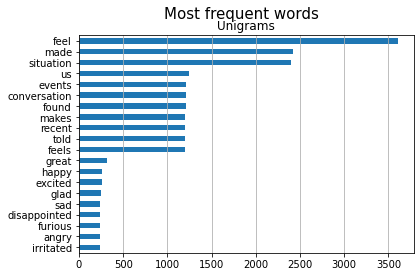

In [ ]:
from collections import Counter
all_words=get_separate_words( df.loc[df['emotion']=='happy'])
Counter = Counter(all_words)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(top)
fig, ax = plt.subplots(nrows=1)
fig.suptitle("Most frequent words", fontsize=15)
    
## unigrams
dtf_uni = pd.DataFrame(most_occur, 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax, 
                  legend=False).grid(axis='x')
ax.set(ylabel=None)

In [ ]:
import wordcloud
wc = wordcloud.WordCloud( background_color='white',    max_words=100 ,     max_font_size=70  )
wc = wc.generate(str(  final_df.loc[final_df['Emotion']=='fear']['clean_text'] ))
fig = plt.figure(figsize=(8, 8),num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()